# Case study 05 (Week 09)

## **Description**

***Case Study on ANOVA***

XYZ Company has offices in four  different zones.

The company wishes to investigate the following :

- The mean sales generated by each zone.
- Total sales generated by all the zones for each month.
- Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.

In [3]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
# Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing scipy itself
import scipy

In [71]:
sdata = pd.read_csv("Sales_data_zone_wise.csv")
sdata.head(5)

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [62]:
# Dataframe at a glance
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [67]:
# Checking for Null values
sdata.isna().sum().to_frame('Null value count')

,Null value count
Month,0
Zone - A,0
Zone - B,0
Zone - C,0
Zone - D,0


In [27]:
# Fetching the details of Month column
sdata.describe(include=['object'])

,Month
count,29
unique,29
top,Month - 1
freq,1


In [28]:
# Setting Months column as the index
sdata.set_index('Month', inplace=True)
sdata.index.name = None
sdata.head(5)

,Zone - A,Zone - B,Zone - C,Zone - D
Month - 1,1483525,1748451,1523308,2267260
Month - 2,1238428,1707421,2212113,1994341
Month - 3,1860771,2091194,1282374,1241600
Month - 4,1871571,1759617,2290580,2252681
Month - 5,1244922,1606010,1818334,1326062


### Insights :
* This Dataset explains about the sales data of 29 months in 4 Different zones of a company.
* There is No null values present in the Dataset.
* Entries of zonewise sales are in int64 format and Months in Object format.

## Task 01

Find the mean sales generated by each zone.

In [37]:
sdata.agg(['mean']).round(2)

,Zone - A,Zone - B,Zone - C,Zone - D
mean,1540493.14,1755559.59,1772871.03,1842926.76


### Notes :
* Zone-D Leads with a sale volume of 1842926.76 as compared to other zones in the Data.

## Task 02

Find the total sales generated by all the zones for each month.

In [29]:
tsdata = sdata.sum(axis=1).to_frame('Total Sales')
tsdata

,Total Sales
Month - 1,7022544
Month - 2,7152303
Month - 3,6475939
Month - 4,8174449
Month - 5,5995328
Month - 6,7151387
Month - 7,7287108
Month - 8,7816299
Month - 9,6703395
Month - 10,7128210


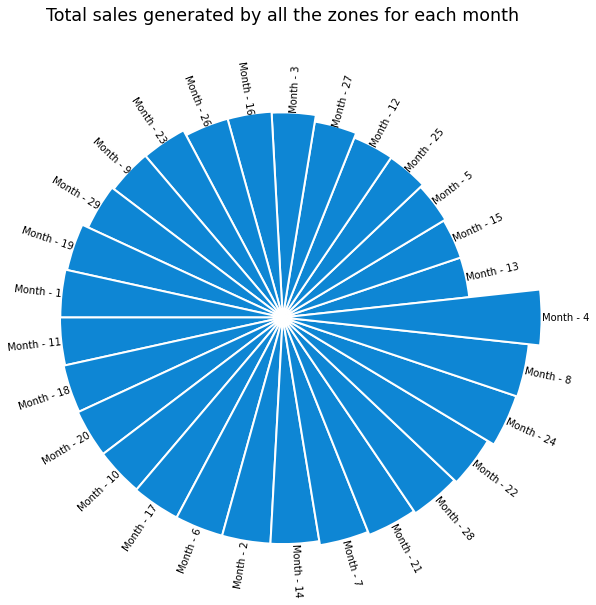

In [68]:
# Reorder the dataframe
tsdata01 = tsdata.sort_values(by=['Total Sales'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants/Parameters controling the plot layout
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Computing max in the dataset
max = tsdata01['Total Sales'].max()
"""
    Computing the heights: they are a conversion of each item value in those new coordinates
    In our case, 0 in the dataset will be converted to the lowerLimit (5925424) and the maximum will be converted to the upperLimit (8174449)

"""
slope = (max - lowerLimit) / max
heights = slope * tsdata01['Total Sales'] + lowerLimit

# Computing the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(tsdata01.index)

# Computing the angle each bar is centered on
indexes = list(range(1, len(tsdata01.index)+1))
angles = [element * width for element in indexes]
angles

# Drawing the bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#0E86D4",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, tsdata01.index):

    # Labels are rotated. Rotation in degrees
    rotation = np.rad2deg(angle)

    # Fliping the labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Final addition of the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")
    
# Alternative : ax.set_title("Total sales generated by all the zones for each month", fontsize=17.5)
plt.title(label="Total sales generated by all the zones for each month",
          loc="center",
          fontsize=17.5)
plt.show()   

### Insights :
* As per the records Month-4 (8174449) tops in the total sales of 4 Zones.
* Least performance recorded at Month-13 (5925424).

## Task 03

Check whether all the zones generate the same amount of sales.

1. **Defining the Hypothesis**
  
    *The mean will be the same for all the zones if all of them generates the same amount of sales*

    *   The Null Hypothesis, ***H(0) : The Means are equal***
    *   The Alternative Hypothesis, ***H(a) : At least, one zone mean is different from other zones***
    *   Significance level = 5%
    *   Here, we are doing **One-way ANOVA Test**
2. **Determining the F-critical Value**

    *To be able to determine F-critical value, we need:*

    *   Significance level
    *   df1 = k-1 (dfn : degrees of freedom nominator) = 3 (4-1)
    *   df2 = N-k (dfd : degrees of freedom denominator) = 25 (29-4)

    *where k = number of the groups (zones), N = number of total observations.*

In [80]:
from scipy.stats import f
dfn = 3
dfd = 25
f_critical = f.ppf(1-0.05,dfn,dfd)
print('F-critical value is %0.7f'%f_critical)

F-critical value is 2.9912409


- **Finding F-statistics and P-value**

In [82]:
f_static, p_value = scipy.stats.f_oneway(sdata['Zone - A'], sdata['Zone - B'], sdata['Zone - B'], sdata['Zone - B'],)
print('F-statistic value is %0.7f'%f_static)
print('P Value is %0.7f'%p_value)
if(p_value<=0.05):
    print("Null Hypothesis is not valid")
else:
    print("Null Hypothesis is valid and acceptable")

F-statistic value is 8.7283361
P Value is 0.0000298
Null Hypothesis is not valid


### Insights :

*  We reject our Null Hypothesis due to the following test results
    - **P-Value is smaller than the level of significance**
    - **F-statistics is greater than the F-critical**
*  These observations lead to the conclusion of "All the zones generate different amount of sales"

**| End of the file reached |**